## Data Exploration Analysis
In this section the data is going to be explored and identify the insights.

In [2]:
# importing library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import mplfinance as mpf
import seaborn as sns
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

In [3]:
# path
import os
import sys
import warnings

In [4]:
sns.set()
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [6]:
from data_info import DataInfo
from visualization import VisualiseDf

## Data Sources 
There are two datasets available for this project.
- The first one is the table that contains information about the trip data
>- Trip ID          
>- Trip Origin       
>- Trip Destination  
>- Trip Start Time   
>- Trip End Time    

- The second one is the table that contains delivery requests by clients order data(completed and unfulfilled) 
 >- id               
 >- order_id       
 >- driver_id        
 >- driver_action 
 >- lat            
 >- lng            
 >- created_at    
 >- updated_at  

In [7]:
#  reading the trip dataset
df_trip = pd.read_csv('../data/nb.csv')

In [8]:
df_trip.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [9]:
# init
df_info = DataInfo(df_trip)

In [10]:
# shape of the data source
df_info.shape_df()

Dataframe contains 536020 rows and 5 columns


In [11]:
# percentage of null in the dataset
df_info.null_percentage()

Dataframe contains null values of 0.06% out of the given dataset


In [12]:
# checking null
df_info.get_count_null()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [13]:
 #information
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None


In [14]:
# order dataset
df_order = pd.read_csv('../data/driver_locations_during_request.csv')

In [15]:
df_order.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.60,3.27,NaN,NaN
1,2,392001,243588,rejected,6.59,3.29,NaN,NaN
2,3,392001,243830,rejected,6.60,3.28,NaN,NaN
3,4,392001,243539,rejected,6.60,3.28,NaN,NaN
4,5,392001,171653,rejected,6.61,3.29,NaN,NaN


In [16]:
order_info = DataInfo(df_order)

In [17]:
# info
order_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB
None


In [18]:
# null info
order_info.get_count_null()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [19]:
# percentage of null in the dataset
order_info.null_percentage()

Dataframe contains null values of 25.0% out of the given dataset


In [20]:
# shape of the data set
order_info.shape_df()

Dataframe contains 1557740 rows and 8 columns


## Data cleaning 
- some null values in the trip data frame (start_time and end time) need to be handled 
- the created_at and updated_at columns from order dataframe need an attention
- datatype of the start and end time shall be Datetime

In [21]:
# droping the null records 
df_trip.dropna(inplace = True)

In [22]:
# checking
df_trip.isna().sum()

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64

In [23]:
# dropping the null columns from the order dataframe
df_order.drop(['created_at', 'updated_at'], inplace=True, axis=1)

In [24]:
# checking
df_order.isna().sum()

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64

In [25]:
# changing start and end time  to datatime 
df_trip['Trip Start Time']= pd.to_datetime(df_trip['Trip Start Time'])
df_trip['Trip End Time']= pd.to_datetime(df_trip['Trip End Time'])

In [26]:
# checking
df_trip.dtypes

Trip ID                      int64
Trip Origin                 object
Trip Destination            object
Trip Start Time     datetime64[ns]
Trip End Time       datetime64[ns]
dtype: object

## Feature engineertring
The following feature are added
- Distance from the `Trip Oring and Trip Destination'
- Speed in second from the `start time and end time` of the trip table would derived.

**Distance computatution from the two coordinates**

In [31]:
# first separate latitide and longitide from the from each coordinate point
df_trip['Trip_Origin_lat'] = df_trip['Trip Origin'].apply(lambda x: str(x).split(',')[0])
df_trip['Trip_Origin_lng'] = df_trip['Trip Origin'].apply(lambda x: str(x).split(',')[1])

In [32]:
# trip destination
df_trip['Trip_Destn_lat'] = df_trip['Trip Destination'].apply(lambda x: str(x).split(',')[0])
df_trip['Trip_Destn_lng'] = df_trip['Trip Destination'].apply(lambda x: str(x).split(',')[1])

In [46]:
# calculating distance in km
import geopy
def distance(row):
    return geopy.distance.distance((row.Trip_Origin_lat, row.Trip_Origin_lng),(row.Trip_Destn_lat, row.Trip_Destn_lng)).km
df_trip['Distance']= df_trip.apply(lambda r: distance(r), axis=1)

In [48]:
df_trip.drop(['Speed'], inplace = True, axis=1)

In [49]:
# adding speed or duration 
df_trip['Speed']= (df_trip['Trip End Time']-df_trip['Trip Start Time']).astype('timedelta64[s]')

In [51]:
# checking 
df_trip.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Trip_Destn_lat,Trip_Destn_lng,Distance,Speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.12,93.00


## Merging the datasets

In [52]:
# mering
df_tripOrder = df_trip.merge(df_order, how='inner', left_on ='Trip ID', right_on ='order_id')

In [ ]:
df_tripOrder.head()

In [54]:
df_tripOrder.to_csv('../data/triporderData.csv')

In [55]:
# copy
df_tripOrders = df_tripOrder.copy()

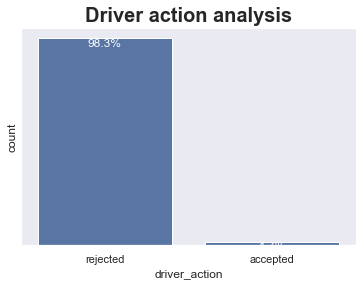

In [56]:
plt.title(f'Driver action analysis', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_tripOrders,df_tripOrders['driver_action'] )

In [70]:
df_tripOrders.head(1)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip_Origin_lat,Trip_Origin_lng,Trip_Destn_lat,Trip_Destn_lng,Distance,Speed,id,order_id,driver_id,driver_action,lat,lng
0,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.98,217.00,1,392001,243828,accepted,6.60,3.27


- As we can see from the above, most of the requests (98.3%) are rejected by the drivers

<AxesSubplot:ylabel='Frequency'>

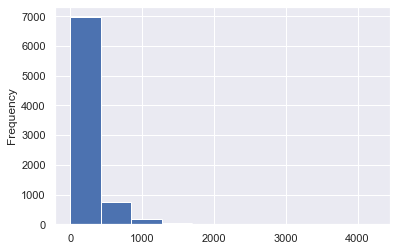

In [57]:
# Speed analysis
df_tripOrders['Speed'].value_counts().plot(kind ='hist')

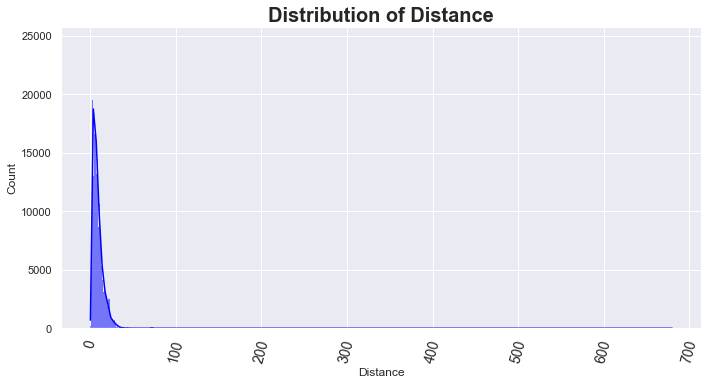

In [67]:
# Distance analysis
VisualiseDf.plot_hist(df_tripOrders,'Distance','blue')

In [ ]:
df_tripOrders_numeric =df_cleaData[['Distance', 'Speed','Driver_action']]

In [72]:
# figuer size
plt.figure(figsize = [10, 8])

# subplot 1: user_type vs member_gender
plt.subplot(3, 1, 1)
sns.countplot(data = df_tripOrders, x = 'Distance', hue = 'driver_action', palette = 'Blues')

# subplot 2: member_gender vs start_day
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_tripOrders, x = 'Speed', hue = 'driver_action', palette = 'Blues')
ax.legend(ncol = 2) 

# # subplot 3: start_day vs user_type
# ax = plt.subplot(3, 1, 3)
# sb.countplot(data = df_cleaData, x = 'start_day', hue = 'user_type', palette = 'Greens')
# ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
# # # subplot 4: start_day vs user_type
# # ax = plt.subplot(4, 1, 3)
# # sb.countplot(data = df_cleaData, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Greens')
# # ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

KeyboardInterrupt: 